In [1]:
import pandas as pd
import numpy as np

In [2]:
wine = pd.read_csv('winequalityN.csv')

In [3]:
wine

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


Segun el dataset de wine, realice las siguientes actividades:
- Limpie las variables numericas. (evalue primero si vale la pena estretificar por type), en caso de existir valores atipicos remplece por la media.
- Aplique PCA utilizando maximo 5 columnas (evalue si el PCA vale la pena hacer uno para white y otro para red)
    - No se debe de usar quality para este ejercicio
- Una ves tenga el PCA, aplique un algoritmo de k-means para crear tres perfiles del vino. (explique que significa cada perfil)
- Agregue la nueva variable al dateset y elimine las columnas que hayan formado parte de analisis del PCA, tanto para white como para red, en caso que hayan sido entrenamientos distintos.
- Crea la varible de respuesta de la siguiente manera:
    - if quality >= 5 ? 1 else 0
- Elimine la variable quality del dataset
- Aplique los siguientes entrenamientos de MLS (evalue primero si vale la pena estretificar por type):
    - Regresion Logistica
    - NN
    - Aroboles de desiciones
    - Random Forest
- Explique cual de los entrenamientos fue el mejor?

In [4]:
#Variable categorica "type", no vale la pena estratificar ya que solo son 2 categorías
wine.loc[:,["type"]].value_counts()

type 
white    4898
red      1599
dtype: int64

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

import datetime

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans

In [7]:
import plotly.express as px

In [8]:
for c_ in wine.columns:
    print(c_)
    print(sum(pd.isnull( wine[c_] )))

type
0
fixed acidity
10
volatile acidity
8
citric acid
3
residual sugar
2
chlorides
2
free sulfur dioxide
0
total sulfur dioxide
0
density
0
pH
9
sulphates
4
alcohol
0
quality
0


In [9]:
wine.loc[ pd.isnull( wine['fixed acidity'] ) , 'fixed acidity' ] = np.mean(wine["fixed acidity"])

In [10]:
wine.loc[ pd.isnull( wine['volatile acidity'] ) , 'volatile acidity' ] = np.mean(wine["volatile acidity"])

In [11]:
wine.loc[ pd.isnull( wine['citric acid'] ) , 'citric acid' ] = np.mean(wine["citric acid"])

In [12]:
wine.loc[ pd.isnull( wine['residual sugar'] ) , 'residual sugar' ] = np.mean(wine["residual sugar"])

In [13]:
wine.loc[ pd.isnull( wine['chlorides'] ) , 'chlorides' ] = np.mean(wine["chlorides"])

In [14]:
wine.loc[ pd.isnull( wine['pH'] ) , 'pH' ] = np.mean(wine["pH"])

In [15]:
wine.loc[ pd.isnull( wine['sulphates'] ) , 'sulphates' ] = np.mean(wine["sulphates"])

In [16]:
for c_ in wine.columns:
    print(c_)
    print(sum(pd.isnull( wine[c_] )))

type
0
fixed acidity
0
volatile acidity
0
citric acid
0
residual sugar
0
chlorides
0
free sulfur dioxide
0
total sulfur dioxide
0
density
0
pH
0
sulphates
0
alcohol
0
quality
0


In [17]:
6 / wine.shape[0]

0.0009235031553024473

In [18]:
wine_n = wine.loc[ : , ['fixed acidity', 'volatile acidity', 'citric acid', 'density','alcohol'] ].copy()

In [19]:
x = wine_n["volatile acidity"] 
y = wine_n["citric acid"]

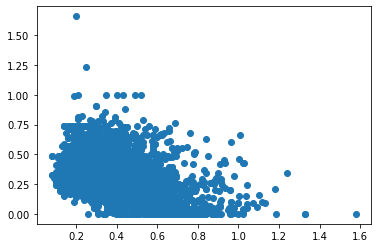

In [20]:
plt.scatter( x , y )

In [21]:
wine_n.corr()

,fixed acidity,volatile acidity,citric acid,density,alcohol
fixed acidity,1.000000,0.219918,0.323349,0.458941,-0.095560
volatile acidity,0.219918,1.000000,-0.377759,0.271107,-0.038215
citric acid,0.323349,-0.377759,1.000000,0.096307,-0.010431
density,0.458941,0.271107,0.096307,1.000000,-0.686745
alcohol,-0.095560,-0.038215,-0.010431,-0.686745,1.000000


In [22]:
c = wine_n.corr()

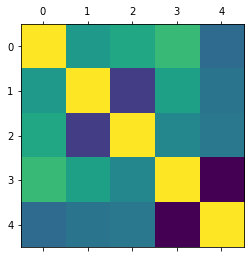

In [23]:
plt.matshow(c)

In [24]:
y = wine_n["density"] 
x = wine_n["fixed acidity"]

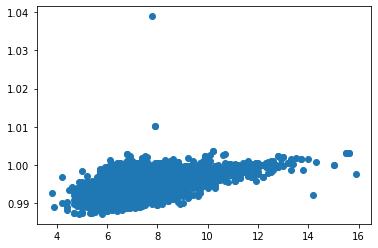

In [25]:
plt.scatter( x , y )

C:\Users\Delmer\AppData\Local\Temp\ipykernel_2856\1104028275.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(c, mask=np.zeros_like(c, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),


<AxesSubplot:>

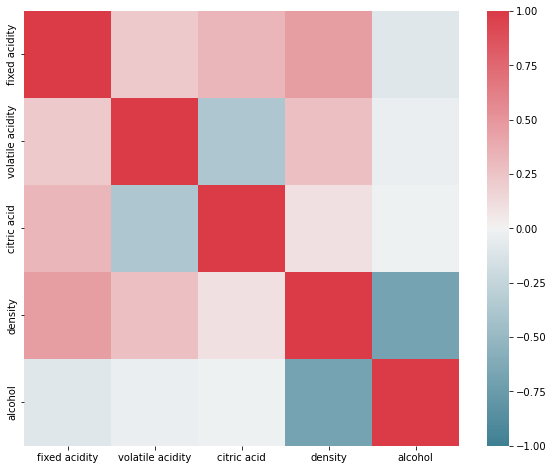

In [26]:
f, ax = plt.subplots(figsize=(10, 8))

sns.heatmap(c, mask=np.zeros_like(c, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax, vmin = -1 , vmax= 1 )

In [27]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.295751,0.164548,0.145231,4.757392,0.035031,17.749400,56.521855,0.002999,0.160637,0.148768,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [28]:
cols_to_use = [
    "fixed acidity"        
    , "volatile acidity"
    , "citric acid"
    , "density"
    , "alcohol"    
]

In [29]:
x = wine.loc[ : , cols_to_use ].values

In [30]:
x

array([[ 7.     ,  0.27   ,  0.36   ,  1.001  ,  8.8    ],
       [ 6.3    ,  0.3    ,  0.34   ,  0.994  ,  9.5    ],
       [ 8.1    ,  0.28   ,  0.4    ,  0.9951 , 10.1    ],
       ...,
       [ 6.3    ,  0.51   ,  0.13   ,  0.99574, 11.     ],
       [ 5.9    ,  0.645  ,  0.12   ,  0.99547, 10.2    ],
       [ 6.     ,  0.31   ,  0.47   ,  0.99549, 11.     ]])

In [31]:
x = StandardScaler().fit_transform(x)

In [32]:
x

array([[-0.1671586 , -0.4235636 ,  0.28424515,  2.10221365, -1.41855821],
       [-0.70742728, -0.24123152,  0.14652315, -0.23233192, -0.83161516],
       [ 0.68183504, -0.36278624,  0.55968916,  0.13452524, -0.32852111],
       ...,
       [-0.70742728,  1.03509307, -1.2995579 ,  0.34796941,  0.42611996],
       [-1.01615224,  1.85558744, -1.3684189 ,  0.25792265, -0.2446721 ],
       [-0.938971  , -0.18045416,  1.04171618,  0.26459278,  0.42611996]])

In [33]:
x = np.around( x , 2 )

In [34]:
np.nan_to_num(x)

array([[-0.17, -0.42,  0.28,  2.1 , -1.42],
       [-0.71, -0.24,  0.15, -0.23, -0.83],
       [ 0.68, -0.36,  0.56,  0.13, -0.33],
       ...,
       [-0.71,  1.04, -1.3 ,  0.35,  0.43],
       [-1.02,  1.86, -1.37,  0.26, -0.24],
       [-0.94, -0.18,  1.04,  0.26,  0.43]])

In [35]:
pca = PCA( n_components=2 )

In [36]:
principalComponents = pca.fit_transform(x)

In [37]:
pcadf = pd.DataFrame(data=principalComponents ,columns=['c1','c2']) 

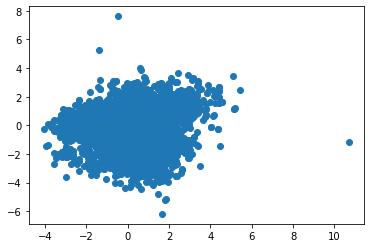

In [38]:
plt.scatter( pcadf['c1'] , pcadf['c2'] )

In [39]:
km = KMeans( n_clusters=3  ).fit(pcadf)

In [40]:
km.cluster_centers_

array([[ 1.06374063,  0.65585869],
       [-1.27076752,  0.20640055],
       [ 0.76543728, -1.87459363]])

In [41]:
cetroids = km.cluster_centers_

In [42]:
km.labels_

array([0, 1, 0, ..., 2, 2, 1])

In [43]:
pcadf

,c1,c2
0,1.975531,0.312024
1,-0.090039,0.073013
2,0.544864,0.783569
3,0.281916,0.387213
4,0.281916,0.387213
...,...,...
6492,-0.107129,-2.386722
6493,-0.533830,-2.141212
6494,-0.206102,-1.776757
6495,0.143902,-2.424330


In [44]:
wine

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.450000,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.490000,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.440000,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.580000,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.531215,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.750000,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.710000,10.2,5


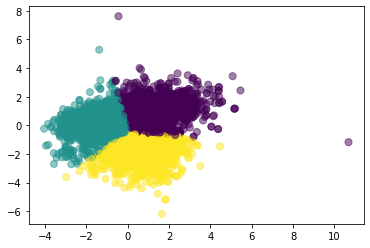

In [45]:
plt.scatter( pcadf['c1'] , pcadf['c2'] , c=km.labels_.astype(float) , s=50, alpha=0.5 )

In [ ]:
"""
Explicación:
    Hay tres clusters de vinos distintos, aunque todos son parecidos cerca del centroide
    Los vinos que estan con puntos de color verde pueden ser recomendados cuando una persona elija un vino que esta en ese 
    cluster y lo mismo para los demas vinos de otros clusters.
"""

In [46]:
wine['cluster'] = km.labels_

In [47]:
wine = wine.drop(['fixed acidity'], axis=1)
wine = wine.drop(['volatile acidity'], axis=1)
wine = wine.drop(['citric acid'], axis=1)
wine = wine.drop(['density'], axis=1)
wine = wine.drop(['alcohol'], axis=1)
wine

,type,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,quality,cluster
0,white,20.7,0.045,45.0,170.0,3.00,0.450000,6,0
1,white,1.6,0.049,14.0,132.0,3.30,0.490000,6,1
2,white,6.9,0.050,30.0,97.0,3.26,0.440000,6,0
3,white,8.5,0.058,47.0,186.0,3.19,0.400000,6,0
4,white,8.5,0.058,47.0,186.0,3.19,0.400000,6,0
...,...,...,...,...,...,...,...,...,...
6492,red,2.0,0.090,32.0,44.0,3.45,0.580000,5,2
6493,red,2.2,0.062,39.0,51.0,3.52,0.531215,6,2
6494,red,2.3,0.076,29.0,40.0,3.42,0.750000,6,2
6495,red,2.0,0.075,32.0,44.0,3.57,0.710000,5,2


In [48]:
wine["response"] = wine.apply(lambda j: 1 if j["quality"] >= 5 else 0, axis=1)

In [49]:
wine = wine.drop(['quality'], axis=1)

In [50]:
wine.head(30)

,type,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,cluster,response
0,white,20.70,0.045,45.0,170.0,3.00,0.45,0,1
1,white,1.60,0.049,14.0,132.0,3.30,0.49,1,1
2,white,6.90,0.050,30.0,97.0,3.26,0.44,0,1
3,white,8.50,0.058,47.0,186.0,3.19,0.40,0,1
4,white,8.50,0.058,47.0,186.0,3.19,0.40,0,1
5,white,6.90,0.050,30.0,97.0,3.26,0.44,0,1
6,white,7.00,0.045,30.0,136.0,3.18,0.47,2,1
7,white,20.70,0.045,45.0,170.0,3.00,0.45,0,1
8,white,1.60,0.049,14.0,132.0,3.30,0.49,1,1
9,white,1.50,0.044,28.0,129.0,3.22,0.45,0,1


In [51]:
### Regresion Logistica ###

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix, roc_curve

In [55]:
wine

,type,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,cluster,response
0,white,20.7,0.045,45.0,170.0,3.00,0.450000,0,1
1,white,1.6,0.049,14.0,132.0,3.30,0.490000,1,1
2,white,6.9,0.050,30.0,97.0,3.26,0.440000,0,1
3,white,8.5,0.058,47.0,186.0,3.19,0.400000,0,1
4,white,8.5,0.058,47.0,186.0,3.19,0.400000,0,1
...,...,...,...,...,...,...,...,...,...
6492,red,2.0,0.090,32.0,44.0,3.45,0.580000,2,1
6493,red,2.2,0.062,39.0,51.0,3.52,0.531215,2,1
6494,red,2.3,0.076,29.0,40.0,3.42,0.750000,2,1
6495,red,2.0,0.075,32.0,44.0,3.57,0.710000,2,1


In [56]:
features_col = wine.columns.values[1:8]

In [57]:
features_col

array(['residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'pH', 'sulphates', 'cluster'], dtype=object)

In [58]:
X = wine[features_col].values
y = wine["response"].values

In [59]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size = 0.25, random_state=0)

In [60]:
log_model = LogisticRegression(solver='lbfgs', max_iter=1000)

In [61]:
X_test

array([[2.00e+00, 1.21e-01, 7.00e+00, ..., 3.24e+00, 7.60e-01, 0.00e+00],
       [2.80e+00, 9.30e-02, 1.90e+01, ..., 3.32e+00, 6.30e-01, 0.00e+00],
       [1.20e+00, 5.00e-02, 2.60e+01, ..., 3.19e+00, 5.20e-01, 1.00e+00],
       ...,
       [1.30e+00, 4.40e-02, 1.10e+01, ..., 3.28e+00, 4.50e-01, 1.00e+00],
       [9.70e+00, 4.40e-02, 6.30e+01, ..., 3.10e+00, 4.60e-01, 0.00e+00],
       [2.50e+00, 1.14e-01, 1.40e+01, ..., 3.24e+00, 6.60e-01, 2.00e+00]])

In [62]:
log_model.fit(
    X_train,
    Y_train)

LogisticRegression(max_iter=1000)

In [63]:
y_pred  = log_model.predict(X_test)

In [64]:
y_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [65]:
Y_test

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [66]:
log_model.predict_proba(X_test)[:] 

array([[0.02078007, 0.97921993],
       [0.02684548, 0.97315452],
       [0.04882121, 0.95117879],
       ...,
       [0.10357924, 0.89642076],
       [0.0054443 , 0.9945557 ],
       [0.06038479, 0.93961521]])

In [67]:
cnf_matrix = metrics.confusion_matrix(Y_test, y_pred)

Text(0.5, 257.44, 'Etiqueta de prediccion')

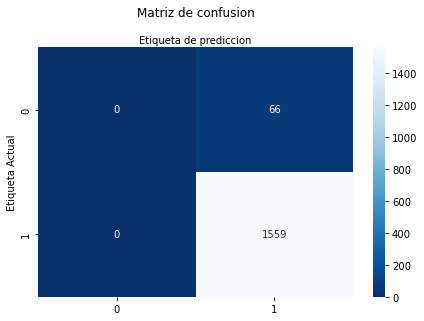

In [68]:
import numpy as np
class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap="Blues_r", fmt="g")
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("Matriz de confusion", y=1.1)
plt.ylabel("Etiqueta Actual")
plt.xlabel("Etiqueta de prediccion")

In [69]:
print(metrics.accuracy_score(Y_test,y_pred))
print(precision_score(Y_test, y_pred))
print(recall_score(Y_test, y_pred))
print(f1_score(Y_test, y_pred))

0.9593846153846154
0.9593846153846154
1.0
0.9792713567839196


In [70]:
metrics.roc_auc_score(Y_test, y_pred)

0.5

In [71]:
### Neuronal Network ###

In [72]:
from sklearn.neural_network import MLPClassifier

In [73]:
x_train = X_train 
x_test = X_test
y_train = Y_train
y_test =  Y_test 

In [74]:
# Making the Neural Network Classifier
NN = MLPClassifier(random_state=1, max_iter=3000)

# Training the model on the training data and labels
NN.fit(x_train, y_train)

# Testing the model i.e. predicting the labels of the test data.
y_pred = NN.predict(x_test)

# Evaluating the results of the model
accuracy = accuracy_score(y_test,y_pred)*100
confusion_mat = confusion_matrix(y_test,y_pred)

In [75]:
print(metrics.accuracy_score(y_test,y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

0.9593846153846154
0.9599507085643869
0.9993585631815266
0.9792583280955374


In [76]:
### Árbol de decisiones ###

In [77]:
from sklearn import tree

In [78]:
tree_one = tree.DecisionTreeClassifier(random_state=1)

In [79]:
tree_one = tree_one.fit( x_train , y_train )

In [80]:
tree_one.tree_.max_depth

20

In [81]:
y_pred = tree_one.predict(x_test)

In [82]:
print(metrics.accuracy_score(y_test,y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

0.9427692307692308
0.969270166453265
0.9711353431686979
0.9702018583787246


In [91]:
from io import StringIO
from IPython.display import Image, display
import pydotplus

out = StringIO()
tree.export_graphviz(tree_one, out_file=out)

graph = pydotplus.graph_from_dot_data(out.getvalue())
graph.write_png("three.png")

True

In [84]:
### Random Forest ###

In [92]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(x_train , y_train);

In [93]:
y_pred = rf.predict(x_test) >= 0.5

In [94]:
print(metrics.accuracy_score(y_test,y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

0.96
0.9622524752475248
0.9974342527261065
0.9795275590551182


In [ ]:
"""
    Al ver todos los entrenamientos se puede ver que dieron resultados parecidos todos los valores arriba del 0.9, pero
    El resultado de regresión logística lo veo como el mejor resultado ya que se utilizó un procedimiento más completo 
    para obtener los resultados

"""